##Problemas en la frontera


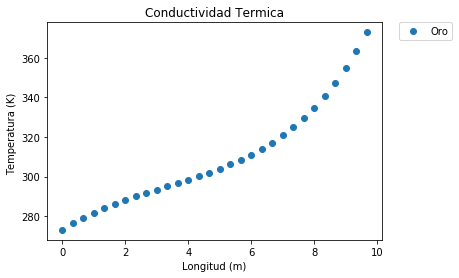

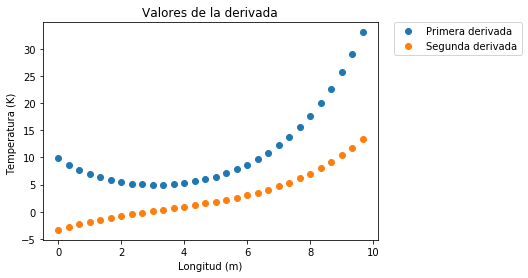

In [88]:
import numpy as np #Importamos numpy
import matplotlib.pyplot as plt #importamos

R=1 # Radio de la barra (m)
L=10 # Longitud de la barra (m)
P=2*(L+2*np.pi*R) # Perímetro de la barra
k=308.2 # Conductividad térmica del oro
A=np.pi*(R**2.) #Area de la barra (m**2)
Ta=273.+20 # Temperatura del aire (K)
Th=273. # Temperatura en x=0 (contacto en punto de congelación) (K)
Tc=273.+100 # Temperatura en x=L (contacto con agua en ebullición) (K)
Tp=0 #Valor incial de la primera derivada
Tpp=1. #Valor inicial de la segunda derivada
N=30 #Numero de iteraciones


#Definimos la ecuación del calor modificada con la de Newton.
def FLOW(x):
    return((h*P)/(k*A))*(x-Ta) #Resultado


def SHOOT(f,x1,x2,y1,z1,n): #f=función,x1=inicio,x2=fin,y1=valor de la primera funcion incial,z1=valor de la segunda inicial,n=pasos
    x=np.zeros([n]) #Array para guardar la información
    y=np.zeros([n]) #Array para guardar la información
    z=np.zeros([n]) #
    x[0]=x1 
    y[0]=y1 
    z[0]=z1
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
        y[i]=y[i-1]+h*f(z[i-1])#Método de Euler 
        z[i]=z[i-1]+h*(y[i-1])#Método de Euler
        x[i]=x[i-1]+h 
    return x,y,z #Resultado del método


#Hacemos el método para la primera derivada
T1=SHOOT(FLOW,0,L,Tp,Th,N)
#Hacemos el método para la segunda derivida
T2=SHOOT(FLOW,0,L,Tpp,Th,N)
#Creamos un array con los valores de la primera y segunda derivada
T=np.array([Tp,Tpp])
#Creamos otro array con los puntos calculados en los extremos de la solución
TT=np.array([T1[2][N-1],T2[2][N-1]]) 
#Ajustamos dicho valor a un polinomio de grado 1
p=np.polyfit(TT,T,1)
#Evaluamos dicho polinomio
t=np.polyval(p,Tc)
#Esto nos da el valor que necesitamos para calcular el problema completo:
Tf=SHOOT(FLOW,0,L,t,Th,N)
#Dibujamos los resultados
plt.figure(0)
plt.plot(T1[0],Tf[2],"o",label="Oro")
plt.xlabel("Longitud (m)")
plt.ylabel("Temperatura (K) ")
plt.title("Conductividad Termica" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(1)
plt.plot(T1[0],Tf[1],"o",label="Primera derivada")
plt.plot(T1[0],FLOW(Tf[2]),"o",label="Segunda derivada")
plt.xlabel("Longitud (m)")
plt.ylabel("Temperatura (K) ")
plt.title("Valores de la derivada" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
